## 1. Probability calculation of a Continuous RV

### Find probability that the normally distributed random variable has a mean of 60 and a standard deviation of 10 and we want to find the probability that x is less than 70

In [39]:
from scipy import stats

In [2]:
stats.norm.cdf(x=70, loc=60, scale=10)
# Cumulative distribution function of the given RV.[P(X<x)]

0.8413447460685429

80% of the students less than 70

### Suppose GMAT scores can be reasonabaly modeled using a normal distribution with mean 711 and std dev.=29. What is P(X<680)

In [3]:
stats.norm.cdf(x=680, loc=711, scale=29)

0.14254260383881612

14% of students scored less than 680 marks in the GMAT examination.

### P(697<X<740)

In [5]:
stats.norm.cdf(x=740, loc=711, scale=29)-stats.norm.cdf(x=697, loc=711, scale=29)

0.5267111786415019

53% of students got GMAT score between 740 to 697.

## 2. Probability Calculations for Stocks using Normal Distribution

#### 1. Import Necessary Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### 2. Import Data

In [4]:
beml_stock=pd.read_csv('BEML.csv')
beml_stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [5]:
glaxo_stock=pd.read_csv('GLAXO.csv')
glaxo_stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


#### 3. Data Understanding

#### 3.1 Initial Investigation

In [6]:
beml_stock.shape

(1739, 8)

In [7]:
glaxo_stock.shape

(1739, 8)

#### 4. Data Preparation

In [8]:
beml_data=beml_stock[['Date','Close']]
beml_data.head()

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05


In [9]:
glaxo_data=glaxo_stock[['Date','Close']]
glaxo_data.head()

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80


#### 3.1...Let's continue our Analysis

In [10]:
beml_data.isnull().sum()

Date     0
Close    0
dtype: int64

In [13]:
beml_data.dtypes

Date      object
Close    float64
dtype: object

In [11]:
glaxo_data.isnull().sum()

Date     0
Close    0
dtype: int64

In [14]:
glaxo_data.dtypes

Date      object
Close    float64
dtype: object

#### 3.2 Data visualization

#### BEML Data

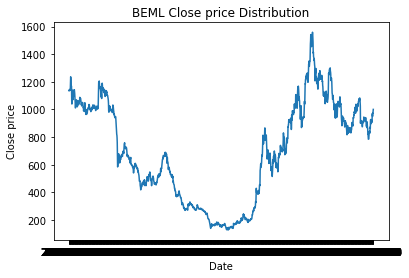

In [15]:
plt.plot(beml_data['Date'], beml_data['Close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('BEML Close price Distribution')
plt.show()

We are getting black color since date is in object data type.<br>
Therefore we convert date to datetime datatype

In [17]:
beml_data['Date']=pd.to_datetime(beml_data['Date'])
beml_data.head()

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05


In [18]:
beml_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

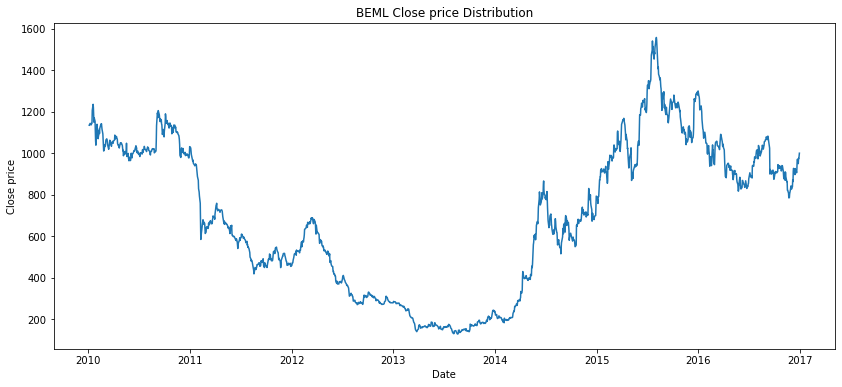

In [20]:
plt.figure(figsize=(14,6))
plt.plot(beml_data['Date'], beml_data['Close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('BEML Close price Distribution')
plt.show()

#### GLAXO Data

In [22]:
glaxo_data['Date']=pd.to_datetime(glaxo_data['Date'])
glaxo_data.head()

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80


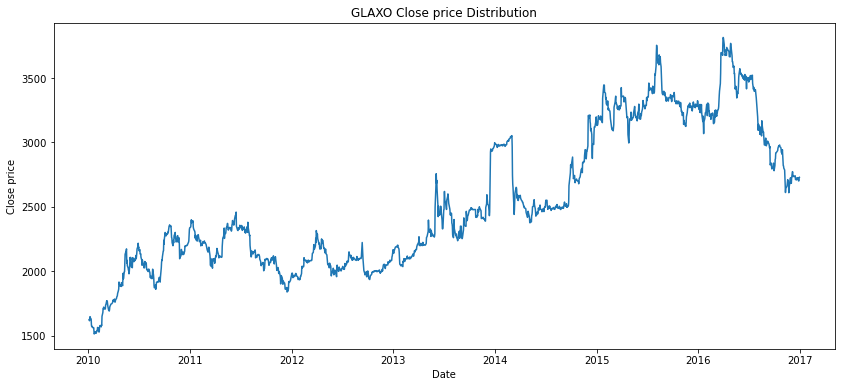

In [23]:
plt.figure(figsize=(14,6))
plt.plot(glaxo_data['Date'], glaxo_data['Close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('GLAXO Close price Distribution')
plt.show()

Comparing both plot we can say that BEML plot has more fluctuations

#### Now let's find out Gain fluctuations

In [28]:
#Gain of BEML data
beml_data['Gain']=beml_data['Close'].pct_change(periods=1)#Percentage change between the current and a prior element.
beml_data.head()

,Date,Close,Gain
0,2010-01-04,1135.60,NaN
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087


In [27]:
glaxo_data['Gain']=glaxo_data['Close'].pct_change(periods=1)#Percentage change between the current and a prior element.
glaxo_data.head()

,Date,Close,Gain
0,2010-01-04,1625.65,NaN
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398


#### Perform data Cleaning

In [29]:
beml_data.dropna(axis=0, inplace=True)
glaxo_data.dropna(axis=0, inplace=True)

In [31]:
beml_data.head()

,Date,Close,Gain
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
5,2010-01-11,1137.00,-0.006162


In [32]:
glaxo_data.head()

,Date,Close,Gain
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
5,2010-01-11,1629.45,-0.006312


#### Let us visualize the Gain Fluctuations

#### BEML

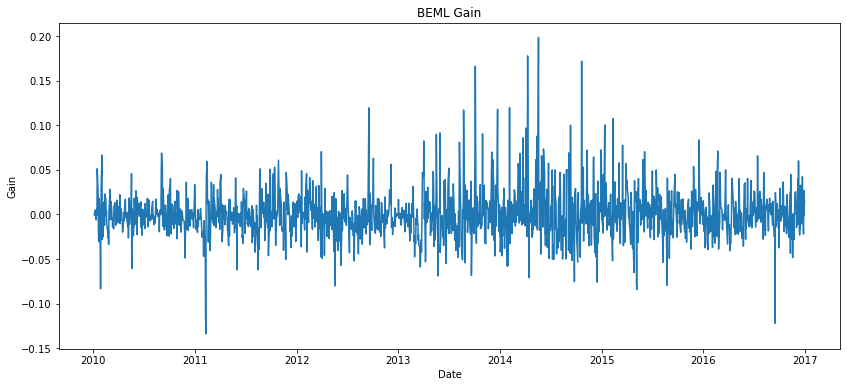

In [33]:
plt.figure(figsize=(14,6))
plt.plot(beml_data['Date'], beml_data['Gain'])
plt.xlabel('Date')
plt.ylabel('Gain')
plt.title('BEML Gain')
plt.show()

#### GLAXO

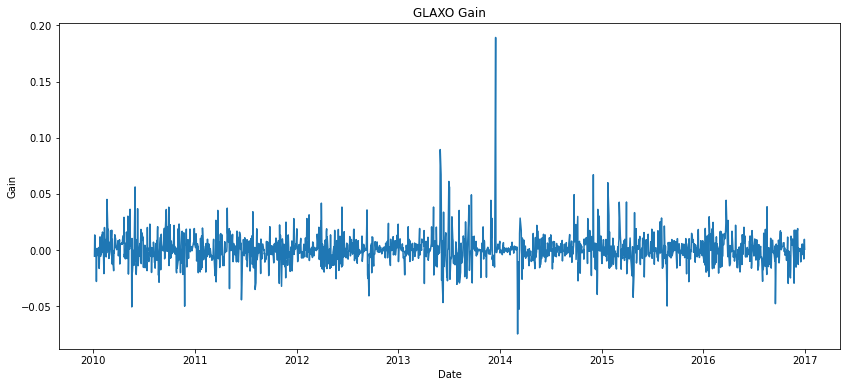

In [35]:
plt.figure(figsize=(14,6))
plt.plot(glaxo_data['Date'], glaxo_data['Gain'])
plt.xlabel('Date')
plt.ylabel('Gain')
plt.title('GLAXO Gain')
plt.show()

### Reflections Questions

### 1. What is the probabilityof making 2% loss or higher in Glaxo?

In [36]:
round(glaxo_data['Gain'].mean(),4)

0.0004

In [37]:
round(glaxo_data['Gain'].std(),4)

0.0134

In [41]:
stats.norm.cdf(x=-0.02, loc=0.0004, scale=0.0134)

0.06395593743937553

There is 6% chance that if any invester invests on Glaxo, he/she will be losing 2% or more than 2% of total investment.

### 2. What is the probabilityof making 2% gain or higher in Glaxo?

In [42]:
1-stats.norm.cdf(x=0.02, loc=0.0004, scale=0.0134)

0.07177658173190637

There is 6% chance that if any invester invests on Glaxo, he/she will be making 2% or more than 2% of total investment.

### 3. What is the probabilityof making 2% loss or higher in BEML?

In [43]:
beml_data['Gain'].mean()

0.00027074807905723154

In [45]:
beml_data['Gain'].std()

0.02643083146847487

In [46]:
stats.norm.cdf(x=-0.02, loc=0.0002, scale=0.0264)

0.2220906635443733

There is 22% chance that if any invester invests on BEML, he/she will be losing 2% or more than 2% of total investment.

### 4. What is the probabilityof making 2% gain or higher in BEML?

In [47]:
1-stats.norm.cdf(x=0.02, loc=0.0002, scale=0.0264)

0.22662735237686826

There is 22% chance that if any invester invests on BEML, he/she will be making 2% or more than 2% of total investment.

### The End Of Desciptive Statistics